In [26]:
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [27]:
X, y =make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

In [28]:
y=to_categorical(y)

In [29]:
print(y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [30]:
n_train=800
train_X,test_X=X[:n_train,:],X[n_train:,:]
train_y, test_y=y[:n_train],y[n_train:]

print(train_X.shape)
print(test_X.shape)

(800, 2)
(200, 2)


In [31]:
print(train_X[:5])

[[  0.48719811  -0.43160548]
 [ -1.48958879  -3.47915742]
 [ -2.06250444  -7.73300419]
 [ -0.51369303 -10.31546366]
 [  0.56240126  -2.18246169]]


In [32]:
model=Sequential()
model.add(Dense(25, input_dim=2,activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 25)                75        
                                                                 
 dense_3 (Dense)             (None, 3)                 78        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 1s 11ms/step - loss: 0.9815 - accuracy: 0.4475 - val_loss: 0.8703 - val_accuracy: 0.5200
Epoch 2/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.8679 - accuracy: 0.5225 - val_loss: 0.7759 - val_accuracy: 0.5900
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7911 - accuracy: 0.6100 - val_loss: 0.7053 - val_accuracy: 0.6850
Epoch 4/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7384 - accuracy: 0.6500 - val_loss: 0.6646 - val_accuracy: 0.7250
Epoch 5/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7011 - accuracy: 0.6812 - val_loss: 0.6302 - val_accuracy: 0.7450
Epoch 6/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.6837 - val_loss: 0.6038 - val_accuracy: 0.7450
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.7000 - val_loss: 0.5813 - val_accuracy: 0.7600
Epoch

In [35]:
_, train_acc = model.evaluate(train_X, train_y)
_, test_acc = model.evaluate(test_X, test_y)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

7/7 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.8500
Train: 0.835, Test: 0.850


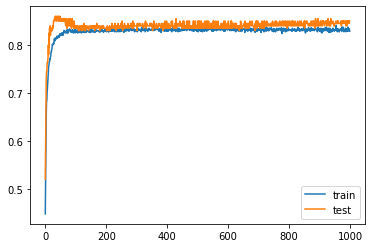

In [37]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# 4.10 project: 이미지 분류 정확도 개선하기

In [14]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
 
import numpy as np
 
from matplotlib import pyplot as plt

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [16]:
print('x_train =', x_train.shape)
print('x_valid =', x_valid.shape)
print('x_test =', x_test.shape)

x_train = (45000, 32, 32, 3)
x_valid = (5000, 32, 32, 3)
x_test = (10000, 32, 32, 3)


In [4]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_valid = (x_valid-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [5]:
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_valid = np_utils.to_categorical(y_valid,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [6]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(x_train)

In [7]:
base_hidden_units = 32
weight_decay = 1e-4
model = Sequential()
 
# CONV1
model.add(Conv2D(base_hidden_units, kernel_size= 3, padding='same',
         kernel_regularizer=regularizers.l2(weight_decay),
input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
 
# CONV2
model.add(Conv2D(base_hidden_units, kernel_size= 3, padding='same', 
         kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
 
# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
# CONV3
model.add(Conv2D(base_hidden_units * 2, kernel_size= 3, padding='same',
         kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
 
# CONV4
model.add(Conv2D(base_hidden_units * 2, kernel_size= 3, padding='same', 
         kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
 
# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
# CONV5
model.add(Conv2D(base_hidden_units * 4, kernel_size= 3, padding='same', 
         kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
 
# CONV6
model.add(Conv2D(base_hidden_units * 4, kernel_size= 3, padding='same',
         kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
 
# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# FC7
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [8]:
import tensorflow as tf 
batch_size = 128
epochs = 125
 
checkpointer = ModelCheckpoint(filepath='model.100epochs.hdf5', verbose=1, save_best_only=True )
optimizer = tf.optimizers.Adam(lr=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
 
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), 
                              callbacks=[checkpointer], 
                              steps_per_epoch=x_train.shape[0] / batch_size, 
                              epochs=epochs, 
                              verbose=2, validation_data=(x_valid, y_valid))

Epoch 1/125


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]



Epoch 1: val_loss improved from inf to 2.16685, saving model to model.100epochs.hdf5
351/351 - 31s - loss: 2.8443 - accuracy: 0.2699 - val_loss: 2.1668 - val_accuracy: 0.2664 - 31s/epoch - 88ms/step
Epoch 2/125

Epoch 2: val_loss improved from 2.16685 to 1.53512, saving model to model.100epochs.hdf5
351/351 - 22s - loss: 2.1424 - accuracy: 0.3543 - val_loss: 1.5351 - val_accuracy: 0.4690 - 22s/epoch - 62ms/step
Epoch 3/125

Epoch 3: val_loss improved from 1.53512 to 1.48308, saving model to model.100epochs.hdf5
351/351 - 22s - loss: 1.9032 - accuracy: 0.3955 - val_loss: 1.4831 - val_accuracy: 0.4852 - 22s/epoch - 62ms/step
Epoch 4/125

Epoch 4: val_loss did not improve from 1.48308
351/351 - 21s - loss: 1.7503 - accuracy: 0.4329 - val_loss: 1.4983 - val_accuracy: 0.4846 - 21s/epoch - 60ms/step
Epoch 5/125

Epoch 5: val_loss did not improve from 1.48308
351/351 - 21s - loss: 1.6397 - accuracy: 0.4617 - val_loss: 1.4857 - val_accuracy: 0.4984 - 21s/epoch - 60ms/step
Epoch 6/125

Epoch 6

In [9]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

79/79 [==============================] - 1s 7ms/step - loss: 0.5073 - accuracy: 0.8468

Test result: 84.680 loss: 0.507


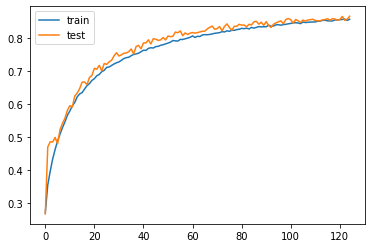

In [10]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()